#### 1

In [16]:
import pandas as pd

cities = {"Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population": [347949, 975551, 233839, 583056]}

df_cities = pd.DataFrame(cities)
df_cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [17]:
#a
df_cities["Kommun"]

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

In [18]:
#b
df_gbg = df_cities[df_cities["Kommun"].str.contains("Göteborg")]
df_gbg

,Kommun,Population
3,Göteborg,583056


In [19]:
#b background
df_cities["Kommun"].str.contains("Göteborg")

0    False
1    False
2    False
3     True
Name: Kommun, dtype: bool

In [20]:
#c background - new index column is created..., dont want that
df_cities_temp = df_cities.sort_values(by="Population", ascending=False).reset_index()
df_cities_temp

,index,Kommun,Population
0,1,Stockholm,975551
1,3,Göteborg,583056
2,0,Malmö,347949
3,2,Uppsala,233839


In [21]:
#c
df_cities = df_cities.sort_values(by="Population", ascending=False, ignore_index=True)
df_cities

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


In [22]:
#d
df_top_3_cities = df_cities.sort_values(by="Population", ascending=False).head(3)
df_top_3_cities

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


In [23]:
#e

tot_population = 10379295

#df_cities.insert(2, "Population (%)", [df_cities["Population (%)"][i] = (df_cities["Population"][i]/tot_population)*100 for i in range 4])
# kan inte göra så då 1. insert skriver över ursprungliga variabeln, 2. loopar inte i pandas utan den (precis som numpy) gör saker radvis/elementvis

df_cities["Population (%)"]=round(100*(df_cities["Population"]/tot_population), 2)
#lägger till automatiskt ny kolumn då det inte fannssådan key
#round(what, antal decimaler)
df_cities

,Kommun,Population,Population (%)
0,Stockholm,975551,9.40
1,Göteborg,583056,5.62
2,Malmö,347949,3.35
3,Uppsala,233839,2.25


#### 2

In [38]:
import pandas as pd

df = pd.read_excel(
    "../Data/komtopp50_2020.xlsx", sheet_name="Totalt", usecols="A:F", header=6
)
df.head()


,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    int64  
 1   2019        290 non-null    int64  
 2   Unnamed: 2  290 non-null    object 
 3   2020.1      290 non-null    int64  
 4   2019.1      290 non-null    int64  
 5   %           290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB


In [32]:
df.describe()

,2020,2019,2020.1,2019.1,%
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862,0.154672
std,83.860002,83.856743,74627.031657,74292.525065,0.953047
min,1.000000,1.000000,2387.000000,2408.000000,-3.208917
25%,73.250000,73.250000,10014.500000,10075.000000,-0.392807
50%,145.500000,145.500000,16079.500000,15978.000000,0.147039
75%,217.750000,217.750000,36215.250000,36096.750000,0.737224
max,290.000000,290.000000,975551.000000,974073.000000,4.088165


In [61]:
df = df.rename(
    columns={
        2020: "Rang 2020",
        2019: "Rang 2019",
        "Unnamed: 2": "Kommun",
        "2020.1": "Folkmängd 2020",
        "2019.1": "Folkmängd 2019",
        "%": "Förändring",
    }
)
df.head()

#???????????????? Varöfr fungerar inte rename på 2020 och 2019??????????????

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [70]:
df_5_smalest = df.sort_values(by="Folkmängd 2020",ignore_index=True).head()
# ingore_index så den inte lägger på en ny kolumn med gamla index
df_5_smalest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,290,290,Bjurholm,2387,2408,-0.872093
1,289,289,Sorsele,2442,2489,-1.888309
2,288,288,Dorotea,2498,2551,-2.077617
3,287,287,Arjeplog,2718,2785,-2.405745
4,286,286,Åsele,2805,2794,0.393701


In [71]:
df_5_largest = df.sort_values(by="Folkmängd 2020", ascending=False, ignore_index=True).head()
df_5_largest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [49]:
tot_2020 = df["Folkmängd 2020"].sum()
tot_2019 = df["Folkmängd 2019"].sum()
print(f"{tot_2020=},{tot_2019=}")

tot_2020=10379295,tot_2019=10327589


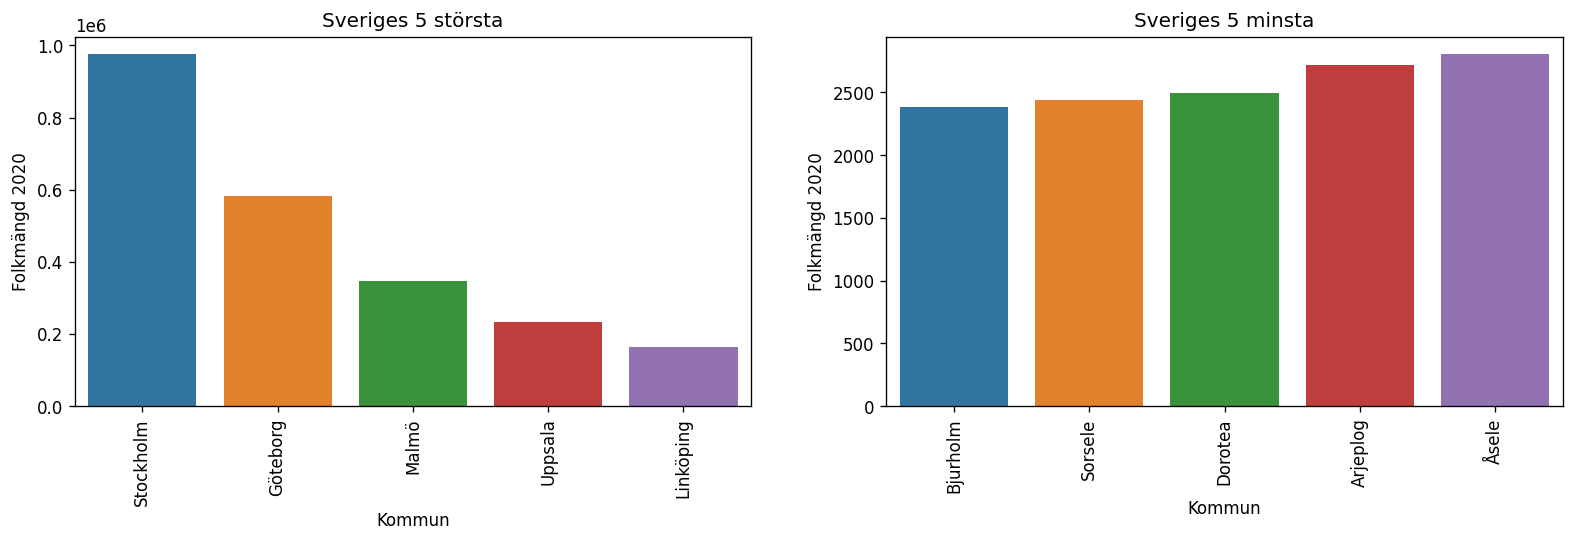

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize = (16,4), dpi = 120)
titles = ["Sveriges 5 största", "Sveriges 5 minsta"]
data_frame = [df_5_largest, df_5_smalest]

for i, (data, title) in enumerate(zip(data_frame, titles)):
    sns.barplot(ax= axes[i], data=data, x = "Kommun", y = "Folkmängd 2020" )
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)


In [69]:
print(axes[0].get_xticklabels())

[Text(0, 0, 'Stockholm'), Text(1, 0, 'Göteborg'), Text(2, 0, 'Malmö'), Text(3, 0, 'Uppsala'), Text(4, 0, 'Linköping')]
